# Experiment Figures

## Load Pickle Files

In [ ]:
import pickle

with open("results.pkl", "rb") as f:
  imperceptibles = pickle.load(f)

In [ ]:
# Handy utility for combining pickles that are output by the experiments tool

import pickle
import glob

def merge(trunk, branch):
  for key, value in branch.items():
    if key in trunk and isinstance(value, dict) and 'adv_example' not in value:
      merge(trunk[key], value)
    else:
      trunk.update({ key: value })

## Example Usage:
#imperceptibles = dict()
#pickles = glob.glob("/content/drive/MyDrive/Pickles/standard/*.pkl")
#
#for pkl in pickles:
#  with open(pkl, 'rb') as f:
#    exp = pickle.load(f)
#  merge(imperceptibles, exp)

## Setup

In [ ]:
!pip install matplotlib
!pip install seaborn

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [ ]:
def budget_graph_data(exp: str, max_budget=None, levenshtein=False):
  count = []
  total = []
  budgets = []
  for budget, budgetexps in sorted(imperceptibles[exp].items(), key=lambda x: int(x[0])):
    if not max_budget or int(budget) <= int(max_budget):
      count.append(0)
      total.append(0)
      budgets.append(int(budget))
      if "sponge" in exp and "translation" in exp:
        for docid, docexps in budgetexps.items():
          for segid, result in docexps.items():
            if levenshtein:
              count[-1] += result['ref_translation_distance']
              total[-1] += 1
            else:
              count[-1] += result['adv_inference_time']
              total[-1] += result['input_inference_time']
      elif "translation" in exp:
        for docid, docexps in budgetexps.items():
          for segid, result in docexps.items():
            if levenshtein:
              count[-1] += result['ref_translation_distance']
            else:
              count[-1] += result['ref_bleu']
            total[-1] += 1
      elif "mnli" in exp and "untargeted" in exp:
        for pairID, result in budgetexps.items():
          if result['adv_prediction_correct']:
            count[-1] += 1
          total[-1] += 1
      elif "mnli" in exp and "_targeted" in exp:
        for pairID, pairIDexps in budgetexps.items():
          for targetClass, result in pairIDexps.items():
            if result['adv_target_success']:
              count[-1] += 1
            total[-1] += 1
      elif "perspective" in exp or "maxtoxic" in exp:
        for rev_id, result in budgetexps.items():
          if result['adv_toxic']:
            count[-1] += 1
          total[-1] += 1
  print(f"{exp} => {', '.join([f'{x}: {y}' for x,y in zip(budgets, total)])}")
  return budgets, list(map(lambda x,y: x/y, count, total))

## MNLI Plots

mnli_invisibles_targeted => 0: 300, 1: 300, 2: 300, 3: 300, 4: 300, 5: 300
mnli_homoglyphs_targeted => 0: 300, 1: 300, 2: 300, 3: 300, 4: 300, 5: 300
mnli_reorderings_targeted => 0: 300, 1: 300, 2: 300, 3: 300, 4: 300, 5: 300
mnli_deletions_targeted => 0: 300, 1: 300, 2: 300, 3: 300, 4: 300, 5: 300
mnli_invisibles_targeted_nologits => 0: 300, 1: 300, 2: 300, 3: 300, 4: 300, 5: 300
mnli_homoglyphs_targeted_nologits => 0: 300, 1: 300, 2: 300, 3: 300, 4: 300, 5: 300
mnli_reorderings_targeted_nologits => 0: 300, 1: 300, 2: 300, 3: 300, 4: 300, 5: 300
mnli_deletions_targeted_nologits => 0: 300, 1: 300, 2: 300, 3: 300, 4: 300, 5: 300


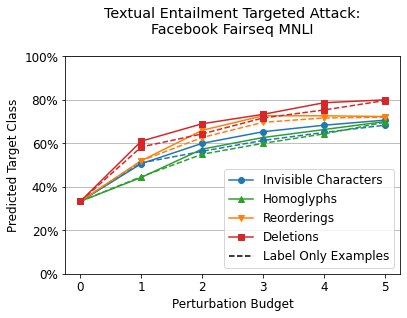

In [ ]:
plt.rc('font', size=12) 

plt.plot(*budget_graph_data('mnli_invisibles_targeted', 5), linestyle='-', marker='o', color="tab:blue", label="Invisible Characters")
plt.plot(*budget_graph_data('mnli_homoglyphs_targeted', 5), linestyle='-', marker='^', color="tab:green", label="Homoglyphs")
plt.plot(*budget_graph_data('mnli_reorderings_targeted', 5), linestyle='-', marker='v', color="tab:orange", label="Reorderings")
plt.plot(*budget_graph_data('mnli_deletions_targeted', 5), linestyle='-', marker='s', color="tab:red", label="Deletions")
plt.plot(*budget_graph_data('mnli_invisibles_targeted_nologits', 5), linestyle='--', marker='o', color="tab:blue")
plt.plot(*budget_graph_data('mnli_homoglyphs_targeted_nologits', 5), linestyle='--', marker='^', color="tab:green")
plt.plot(*budget_graph_data('mnli_reorderings_targeted_nologits', 5), linestyle='--', marker='v', color="tab:orange")
plt.plot(*budget_graph_data('mnli_deletions_targeted_nologits', 5), linestyle='--', marker='s', color="tab:red")
plt.plot([],[], linestyle='--', color="black", label="Label Only Examples")

plt.xlabel("Perturbation Budget")
plt.ylabel("Predicted Target Class")
plt.title("Textual Entailment Targeted Attack:\nFacebook Fairseq MNLI\n")
plt.ylim(0,1)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.legend()
plt.grid(axis='y')
plt.savefig("mnli_targeted.svg")
plt.show()

mnli_invisibles_untargeted => 0: 500, 1: 500, 2: 500, 3: 500, 4: 500, 5: 500
mnli_homoglyphs_untargeted => 0: 500, 1: 500, 2: 500, 3: 500, 4: 500, 5: 500
mnli_reorderings_untargeted => 0: 500, 1: 500, 2: 500, 3: 500, 4: 500, 5: 500
mnli_deletions_untargeted => 0: 500, 1: 500, 2: 500, 3: 500, 4: 500, 5: 500


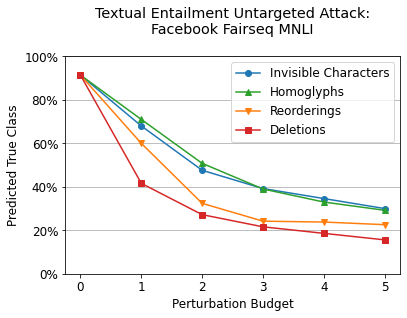

In [ ]:
plt.rc('font', size=12) 

plt.plot(*budget_graph_data('mnli_invisibles_untargeted'), linestyle='-', marker='o', color="tab:blue", label="Invisible Characters")
plt.plot(*budget_graph_data('mnli_homoglyphs_untargeted'), linestyle='-', marker='^', color="tab:green", label="Homoglyphs")
plt.plot(*budget_graph_data('mnli_reorderings_untargeted'), linestyle='-', marker='v', color="tab:orange", label="Reorderings")
plt.plot(*budget_graph_data('mnli_deletions_untargeted'), linestyle='-', marker='s', color="tab:red", label="Deletions")

plt.xlabel("Perturbation Budget")
plt.ylabel("Predicted True Class")
plt.title("Textual Entailment Untargeted Attack:\nFacebook Fairseq MNLI\n")
plt.xticks(range(6))
plt.ylim(0,1)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.legend()
plt.grid(axis='y')
plt.savefig("mnli_untargeted.svg")
plt.show()

## Translation Fairseq Plots

translation_invisibles => 0: 500, 1: 500, 2: 500, 3: 500, 4: 500, 5: 500
translation_homoglyphs => 0: 500, 1: 500, 2: 500, 3: 500, 4: 500, 5: 500
translation_reorderings => 0: 500, 1: 500, 2: 500, 3: 500, 4: 500, 5: 500
translation_deletions => 0: 500, 1: 500, 2: 500, 3: 500, 4: 500, 5: 500


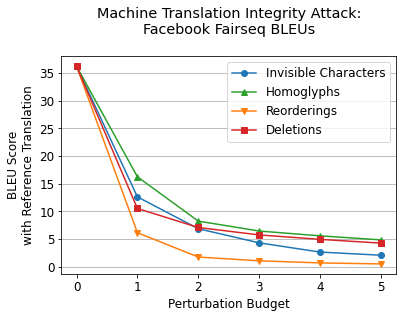

In [ ]:
plt.rc('font', size=12) 

plt.plot(*budget_graph_data('translation_invisibles'), linestyle='-', marker='o', color="tab:blue", label="Invisible Characters")
plt.plot(*budget_graph_data('translation_homoglyphs'), linestyle='-', marker='^', color="tab:green", label="Homoglyphs")
plt.plot(*budget_graph_data('translation_reorderings'), linestyle='-', marker='v', color="tab:orange", label="Reorderings")
plt.plot(*budget_graph_data('translation_deletions'), linestyle='-', marker='s', color="tab:red", label="Deletions")

plt.xlabel("Perturbation Budget")
plt.ylabel("BLEU Score\nwith Reference Translation")
plt.title("Machine Translation Integrity Attack:\nFacebook Fairseq BLEUs\n")
plt.xticks(range(6))
plt.legend()
plt.grid(axis='y')
plt.savefig("BLEU_Fairseq.svg")
plt.show()

translation_invisibles => 0: 500, 1: 500, 2: 500, 3: 500, 4: 500, 5: 500
translation_homoglyphs => 0: 500, 1: 500, 2: 500, 3: 500, 4: 500, 5: 500
translation_reorderings => 0: 500, 1: 500, 2: 500, 3: 500, 4: 500, 5: 500
translation_deletions => 0: 500, 1: 500, 2: 500, 3: 500, 4: 500, 5: 500


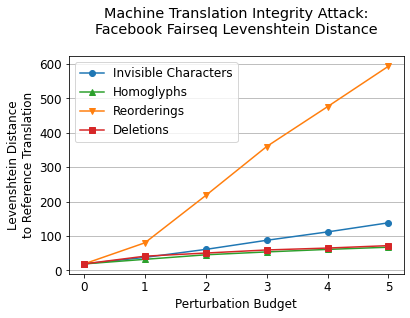

In [ ]:
plt.rc('font', size=12) 

plt.plot(*budget_graph_data('translation_invisibles', levenshtein=True), linestyle='-', marker='o', color="tab:blue", label="Invisible Characters")
plt.plot(*budget_graph_data('translation_homoglyphs', levenshtein=True), linestyle='-', marker='^', color="tab:green", label="Homoglyphs")
plt.plot(*budget_graph_data('translation_reorderings', levenshtein=True), linestyle='-', marker='v', color="tab:orange", label="Reorderings")
plt.plot(*budget_graph_data('translation_deletions', levenshtein=True), linestyle='-', marker='s', color="tab:red", label="Deletions")

plt.xlabel("Perturbation Budget")
plt.ylabel("Levenshtein Distance\nto Reference Translation")
plt.title("Machine Translation Integrity Attack:\nFacebook Fairseq Levenshtein Distance\n")
plt.xticks(range(6))
plt.legend()
plt.grid(axis='y')
plt.savefig("Levenshtein_Fairseq.svg")
plt.show()

## Toxic Content Perspective API

perspective_invisibles => 0: 50, 1: 50, 2: 50, 3: 50, 4: 50, 5: 50
perspective_homoglyphs => 0: 50, 1: 50, 2: 50, 3: 50, 4: 50, 5: 50
perspective_reorderings => 0: 50, 1: 50, 2: 50, 3: 50, 4: 50, 5: 50
perspective_deletions => 0: 50, 1: 50, 2: 50, 3: 50, 4: 50, 5: 50


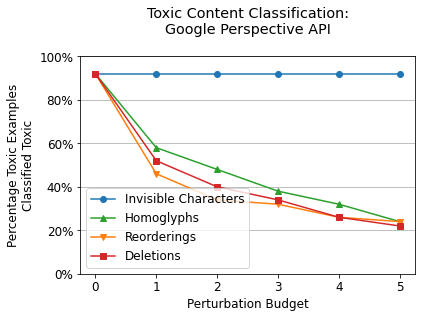

In [ ]:
plt.rc('font', size=12) 

plt.plot(*budget_graph_data('perspective_invisibles', 5), linestyle='-', marker='o', color="tab:blue", label="Invisible Characters")
plt.plot(*budget_graph_data('perspective_homoglyphs', 5), linestyle='-', marker='^', color="tab:green", label="Homoglyphs")
plt.plot(*budget_graph_data('perspective_reorderings', 5), linestyle='-', marker='v', color="tab:orange", label="Reorderings")
plt.plot(*budget_graph_data('perspective_deletions', 5), linestyle='-', marker='s', color="tab:red", label="Deletions")

plt.xlabel("Perturbation Budget")
plt.ylabel("Percentage Toxic Examples\nClassified Toxic")
plt.title("Toxic Content Classification:\nGoogle Perspective API\n")
plt.xticks(range(6))
plt.ylim(0,1)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.legend()
plt.grid(axis='y')
plt.savefig("perspective.svg")
plt.show()

## Toxic Content IBM Classifier

maxtoxic_invisibles => 0: 250, 1: 250, 2: 250, 3: 250, 4: 250, 5: 250
maxtoxic_homoglyphs => 0: 250, 1: 250, 2: 250, 3: 250, 4: 250, 5: 250
maxtoxic_reorderings => 0: 250, 1: 250, 2: 250, 3: 250, 4: 250, 5: 250
maxtoxic_deletions => 0: 250, 1: 250, 2: 250, 3: 250, 4: 250, 5: 250


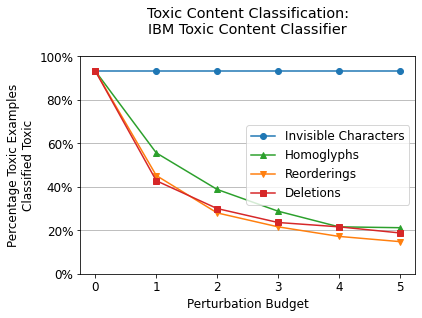

In [ ]:
plt.rc('font', size=12) 

plt.plot(*budget_graph_data('maxtoxic_invisibles', 5), linestyle='-', marker='o', color="tab:blue", label="Invisible Characters")
plt.plot(*budget_graph_data('maxtoxic_homoglyphs', 5), linestyle='-', marker='^', color="tab:green", label="Homoglyphs")
plt.plot(*budget_graph_data('maxtoxic_reorderings', 5), linestyle='-', marker='v', color="tab:orange", label="Reorderings")
plt.plot(*budget_graph_data('maxtoxic_deletions', 5), linestyle='-', marker='s', color="tab:red", label="Deletions")

plt.xlabel("Perturbation Budget")
plt.ylabel("Percentage Toxic Examples\nClassified Toxic")
plt.title("Toxic Content Classification:\nIBM Toxic Content Classifier\n")
plt.xticks(range(6))
plt.ylim(0,1)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.legend()
plt.grid(axis='y')
plt.savefig("maxtoxic.svg")
plt.show()

## Fairseq Sponge Examples Availability Attack

translation_sponge_invisibles => 0: 82.18696955312043, 1: 81.68299204483628, 2: 83.04812015034258, 3: 82.96989417169243, 4: 80.01412664499367, 5: 93.48485797317699
translation_sponge_homoglyphs => 0: 86.10353180766106, 1: 87.74499837867916, 2: 87.5067366566509, 3: 87.29835024662316, 4: 88.6702232491225, 5: 88.13509569503367
translation_sponge_reorderings => 0: 85.5861209500581, 1: 87.09302026964724, 2: 86.76041122339666, 3: 83.98015977907926, 4: 82.93738659354858, 5: 84.57830219063908
translation_sponge_deletions => 0: 86.32193449884653, 1: 87.96191536821425, 2: 87.3687130305916, 3: 84.83521153964102, 4: 83.54870251845568, 5: 84.15697366767563


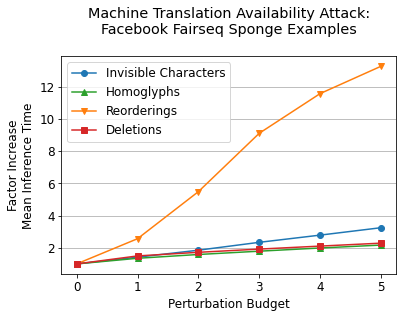

In [ ]:
plt.rc('font', size=12) 

plt.plot(*budget_graph_data('translation_sponge_invisibles', 5), linestyle='-', marker='o', color="tab:blue", label="Invisible Characters")
plt.plot(*budget_graph_data('translation_sponge_homoglyphs', 5), linestyle='-', marker='^', color="tab:green", label="Homoglyphs")
plt.plot(*budget_graph_data('translation_sponge_reorderings', 5), linestyle='-', marker='v', color="tab:orange", label="Reorderings")
plt.plot(*budget_graph_data('translation_sponge_deletions', 5), linestyle='-', marker='s', color="tab:red", label="Deletions")

plt.xlabel("Perturbation Budget")
plt.ylabel("Factor Increase\nMean Inference Time")
plt.title("Machine Translation Availability Attack:\nFacebook Fairseq Sponge Examples\n")
plt.xticks(range(6))
plt.legend()
plt.grid(axis='y')
plt.savefig("sponges.svg")
plt.show()

translation_sponge_invisibles => 0: 500, 1: 500, 2: 500, 3: 500, 4: 500, 5: 500
translation_sponge_homoglyphs => 0: 500, 1: 500, 2: 500, 3: 500, 4: 500, 5: 500
translation_sponge_reorderings => 0: 500, 1: 500, 2: 500, 3: 500, 4: 500, 5: 500
translation_sponge_deletions => 0: 500, 1: 500, 2: 500, 3: 500, 4: 500, 5: 500


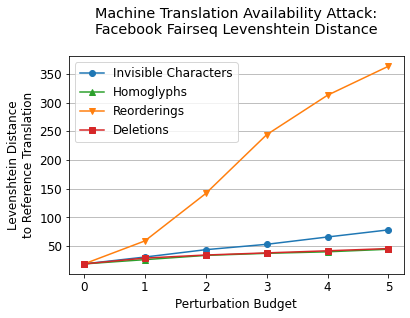

In [ ]:
plt.rc('font', size=12) 

plt.plot(*budget_graph_data('translation_sponge_invisibles', levenshtein=True), linestyle='-', marker='o', color="tab:blue", label="Invisible Characters")
plt.plot(*budget_graph_data('translation_sponge_homoglyphs', levenshtein=True), linestyle='-', marker='^', color="tab:green", label="Homoglyphs")
plt.plot(*budget_graph_data('translation_sponge_reorderings', levenshtein=True), linestyle='-', marker='v', color="tab:orange", label="Reorderings")
plt.plot(*budget_graph_data('translation_sponge_deletions', levenshtein=True), linestyle='-', marker='s', color="tab:red", label="Deletions")

plt.xlabel("Perturbation Budget")
plt.ylabel("Levenshtein Distance\nto Reference Translation")
plt.title("Machine Translation Availability Attack:\nFacebook Fairseq Levenshtein Distance\n")
plt.xticks(range(6))
plt.legend()
plt.grid(axis='y')
plt.savefig("Levenshtein_Sponge.svg")
plt.show()

## Translation MLaaS Plots

### Setup

In [ ]:
# Download EN-FR Test Data
!wget -c http://statmt.org/wmt14/test-full.tgz -O - | tar -xz
!mv test-full/newstest2014-fren-src.en.sgm .
!mv test-full/newstest2014-fren-ref.fr.sgm .
!rm -rf test-full/
!pip install beautifulsoup4 sacrebleu textdistance numpy

In [ ]:
# Build target mappings for BLEU scoring
from bs4 import BeautifulSoup

with open('newstest2014-fren-ref.fr.sgm', 'r') as f:
  target_doc = BeautifulSoup(f, 'html.parser')

target = dict()

for doc in target_doc.find_all('doc'):
  target[str(doc['docid'])] = dict()
  for seg in doc.find_all('seg'):
    target[str(doc['docid'])][str(seg['id'])] = str(seg.string)

In [ ]:
import numpy as np
from sacrebleu import corpus_bleu
from textdistance import levenshtein

def bleus_mlaas(perturbs, res_label):
  scores = { '0': [] }
  for docid, doc in perturbs['1'].items():
    for segid, seg in doc.items():
      ideal = target[docid][segid]
      baseline = seg['baseline_output']
      bleu = corpus_bleu(baseline, ideal)
      scores['0'].append(bleu.score)
  for budget, docs in perturbs.items():
    scores[budget] = []
    for docid, doc in docs.items():
      for segid, seg in doc.items():
        ideal = target[docid][segid]
        perturb = seg[res_label]
        bleu = corpus_bleu(perturb, ideal)
        scores[budget].append(bleu.score)
  x, y = [], []
  for budget, scores in scores.items():
    x.append(int(budget))
    y.append(np.average(scores))
  return x, y

def levenshtein_mlaas(perturbs, res_label):
  scores = { '0': [] }
  for docid, doc in perturbs['1'].items():
    for segid, seg in doc.items():
      ideal = target[docid][segid]
      baseline = seg['baseline_output']
      dis = levenshtein.distance(baseline, ideal)
      scores['0'].append(dis)
  for budget, docs in perturbs.items():
    scores[budget] = []
    for docid, doc in docs.items():
      for segid, seg in doc.items():
        ideal = target[docid][segid]
        perturb = seg[res_label]
        dis = levenshtein.distance(perturb, ideal)
        scores[budget].append(dis)
  x, y = [], []
  for budget, scores in scores.items():
    x.append(int(budget))
    y.append(np.average(scores))
  return x, y

### Azure

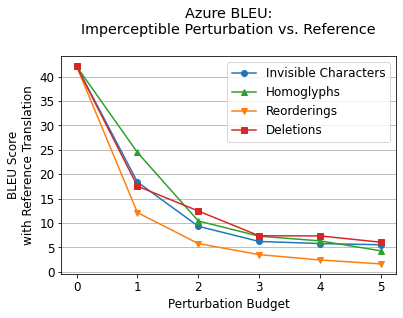

In [ ]:
# BLEU Plot Azure
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', size=12) 

plt.plot(*bleus_mlaas(imperceptibles['azure_invisible_chars'], 'output_azure'), linestyle='-', marker='o', color="tab:blue", label="Invisible Characters")
plt.plot(*bleus_mlaas(imperceptibles['azure_homoglyphs'], 'output_azure'), linestyle='-', marker='^', color="tab:green", label="Homoglyphs")
plt.plot(*bleus_mlaas(imperceptibles['azure_reorder'], 'output_azure'), linestyle='-', marker='v', color="tab:orange", label="Reorderings")
plt.plot(*bleus_mlaas(imperceptibles['azure_deletion'], 'output_azure'), linestyle='-', marker='s', color="tab:red", label="Deletions")

plt.xlabel("Perturbation Budget")
plt.ylabel("BLEU Score\nwith Reference Translation")
plt.title("Azure BLEU:\nImperceptible Perturbation vs. Reference\n")
plt.xticks(range(6))
plt.legend()
plt.grid(axis='y')
plt.savefig("BLEU_Azure.svg")
plt.show()

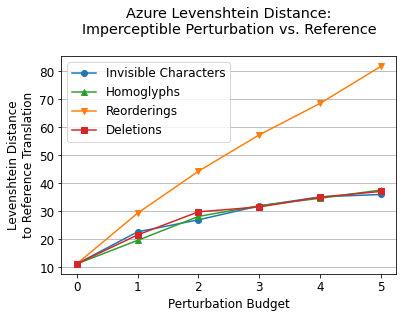

In [ ]:
# Levenshtein Plot Azure
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', size=12) 

plt.plot(*levenshtein_mlaas(imperceptibles['azure_invisible_chars'], 'output_azure'), linestyle='-', marker='o', color="tab:blue", label="Invisible Characters")
plt.plot(*levenshtein_mlaas(imperceptibles['azure_homoglyphs'], 'output_azure'), linestyle='-', marker='^', color="tab:green", label="Homoglyphs")
plt.plot(*levenshtein_mlaas(imperceptibles['azure_reorder'], 'output_azure'), linestyle='-', marker='v', color="tab:orange", label="Reorderings")
plt.plot(*levenshtein_mlaas(imperceptibles['azure_deletion'], 'output_azure'), linestyle='-', marker='s', color="tab:red", label="Deletions")

plt.xlabel("Perturbation Budget")
plt.ylabel("Levenshtein Distance\nto Reference Translation")
plt.title("Azure Levenshtein Distance:\nImperceptible Perturbation vs. Reference\n")
plt.xticks(range(6))
plt.legend()
plt.grid(axis='y')
plt.savefig("Levenshtein_Azure.svg")
plt.show()

### Google Translate

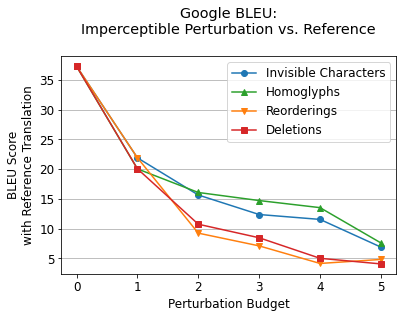

In [ ]:
# BLEU Plot Google
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', size=12) 

plt.plot(*bleus_mlaas(imperceptibles['google_invisible_chars'], 'output_google'), linestyle='-', marker='o', color="tab:blue", label="Invisible Characters")
plt.plot(*bleus_mlaas(imperceptibles['google_homoglyphs'], 'output_google'), linestyle='-', marker='^', color="tab:green", label="Homoglyphs")
plt.plot(*bleus_mlaas(imperceptibles['google_reorder'], 'output_google'), linestyle='-', marker='v', color="tab:orange", label="Reorderings")
plt.plot(*bleus_mlaas(imperceptibles['google_deletion'], 'output_google'), linestyle='-', marker='s', color="tab:red", label="Deletions")

plt.xlabel("Perturbation Budget")
plt.ylabel("BLEU Score\nwith Reference Translation")
plt.title("Google BLEU:\nImperceptible Perturbation vs. Reference\n")
plt.xticks(range(6))
plt.legend()
plt.grid(axis='y')
plt.savefig("BLEU_Google.svg")
plt.show()

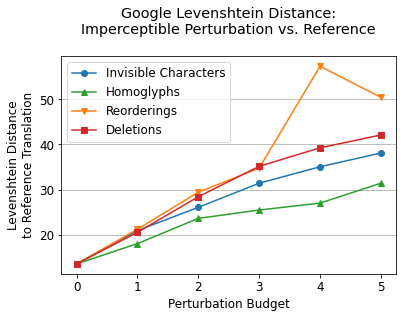

In [ ]:
# Levenshtein Plot Google
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', size=12) 

plt.plot(*levenshtein_mlaas(imperceptibles['google_invisible_chars'], 'output_google'), linestyle='-', marker='o', color="tab:blue", label="Invisible Characters")
plt.plot(*levenshtein_mlaas(imperceptibles['google_homoglyphs'], 'output_google'), linestyle='-', marker='^', color="tab:green", label="Homoglyphs")
plt.plot(*levenshtein_mlaas(imperceptibles['google_reorder'], 'output_google'), linestyle='-', marker='v', color="tab:orange", label="Reorderings")
plt.plot(*levenshtein_mlaas(imperceptibles['google_deletion'], 'output_google'), linestyle='-', marker='s', color="tab:red", label="Deletions")

plt.xlabel("Perturbation Budget")
plt.ylabel("Levenshtein Distance\nto Reference Translation")
plt.title("Google Levenshtein Distance:\nImperceptible Perturbation vs. Reference\n")
plt.xticks(range(6))
plt.legend()
plt.grid(axis='y')
plt.savefig("Levenshtein_Google.svg")
plt.show()

### Azure vs. Google

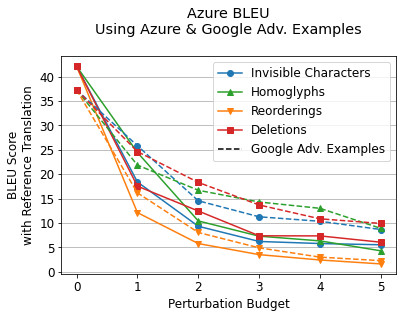

In [ ]:
# BLEU Plot Azure with Google Perturbs
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', size=12) 

plt.plot(*bleus_mlaas(imperceptibles['azure_invisible_chars'], 'output_azure'), linestyle='-', marker='o', color="tab:blue", label="Invisible Characters")
plt.plot(*bleus_mlaas(imperceptibles['azure_homoglyphs'], 'output_azure'), linestyle='-', marker='^', color="tab:green", label="Homoglyphs")
plt.plot(*bleus_mlaas(imperceptibles['azure_reorder'], 'output_azure'), linestyle='-', marker='v', color="tab:orange", label="Reorderings")
plt.plot(*bleus_mlaas(imperceptibles['azure_deletion'], 'output_azure'), linestyle='-', marker='s', color="tab:red", label="Deletions")
plt.plot(*bleus_mlaas(imperceptibles['google_invisible_chars'], 'output_azure'), linestyle='--', marker='o', color="tab:blue")
plt.plot(*bleus_mlaas(imperceptibles['google_homoglyphs'], 'output_azure'), linestyle='--', marker='^', color="tab:green")
plt.plot(*bleus_mlaas(imperceptibles['google_reorder'], 'output_azure'), linestyle='--', marker='v', color="tab:orange")
plt.plot(*bleus_mlaas(imperceptibles['google_deletion'], 'output_azure'), linestyle='--', marker='s', color="tab:red")
plt.plot([],[], linestyle='--', color="black", label="Google Adv. Examples")

plt.xlabel("Perturbation Budget")
plt.ylabel("BLEU Score\nwith Reference Translation")
plt.title("Azure BLEU\nUsing Azure & Google Adv. Examples\n")
plt.xticks(range(6))
plt.legend()
plt.grid(axis='y')
plt.savefig("BLEU_Azure_using_Google.svg")
plt.show()

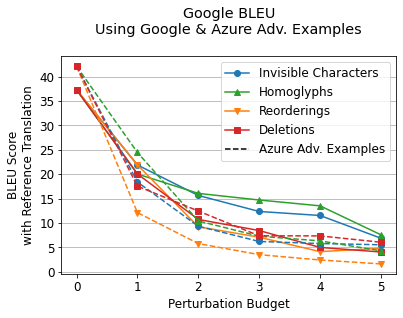

In [ ]:
# BLEU Plot Google with Azure Perturbs
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', size=12) 

plt.plot(*bleus_mlaas(imperceptibles['google_invisible_chars'], 'output_google'), linestyle='-', marker='o', color="tab:blue", label="Invisible Characters")
plt.plot(*bleus_mlaas(imperceptibles['google_homoglyphs'], 'output_google'), linestyle='-', marker='^', color="tab:green", label="Homoglyphs")
plt.plot(*bleus_mlaas(imperceptibles['google_reorder'], 'output_google'), linestyle='-', marker='v', color="tab:orange", label="Reorderings")
plt.plot(*bleus_mlaas(imperceptibles['google_deletion'], 'output_google'), linestyle='-', marker='s', color="tab:red", label="Deletions")
plt.plot(*bleus_mlaas(imperceptibles['azure_invisible_chars'], 'output_azure'), linestyle='--', marker='o', color="tab:blue")
plt.plot(*bleus_mlaas(imperceptibles['azure_homoglyphs'], 'output_azure'), linestyle='--', marker='^', color="tab:green")
plt.plot(*bleus_mlaas(imperceptibles['azure_reorder'], 'output_azure'), linestyle='--', marker='v', color="tab:orange")
plt.plot(*bleus_mlaas(imperceptibles['azure_deletion'], 'output_azure'), linestyle='--', marker='s', color="tab:red")
plt.plot([],[], linestyle='--', color="black", label="Azure Adv. Examples")

plt.xlabel("Perturbation Budget")
plt.ylabel("BLEU Score\nwith Reference Translation")
plt.title("Google BLEU\nUsing Google & Azure Adv. Examples\n")
plt.xticks(range(6))
plt.legend()
plt.grid(axis='y')
plt.savefig("BLEU_Google_using_Azure.svg")
plt.show()

# Homoglyph Clustering Visualization

## Setup

In [ ]:
!pip install tensorflow pillow tqdm keras sklearn matplotlib pandas numpy
!sudo apt-get install -y unifont

In [ ]:
import logging
import multiprocessing
import os
import sys
import unicodedata
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from contextlib import closing
from PIL import Image, ImageDraw, ImageFont, ImageFilter
from tqdm import tqdm
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import VGG16
from keras.models import Model
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from random import randint
from tqdm import tqdm

width, height = 224, 224
background_color = 255, 255, 255 # white
font_color = 0, 0, 0             # black
font_size = 120
logger = multiprocessing.get_logger()

def sanitize(filename, replacement_char=u'\ufffd'):
    # \0 and / can't be in POSIX filename
    return filename.replace(u'\x00', replacement_char)\
                   .replace(u'/', replacement_char)

def init(): # executed while starting a new child process
    os.chdir(destination_directory)

def save_as_image(unicode_ordinal):
    char = chr(unicode_ordinal)
    try:
        name = unicodedata.name(char)
    except ValueError as e: # no such name
        logger.debug(u"%s (U+%x): %s", char, unicode_ordinal, e)
        return None

    filename = sanitize(u'{ord}.jpg'.format(
        ord=unicode_ordinal))
    image = Image.new("RGB", (width, height), background_color)
    ImageDraw.Draw(image).text((10, 10), chr(unicode_ordinal), font=unicode_font, fill=font_color)
    image.save(filename)
    return filename

def save_as_image_mp(unicode_ordinal):
    try:
        return unicode_ordinal, save_as_image(unicode_ordinal), None
    except Exception as e:
        return unicode_ordinal, None, str(e)

def generate_glyphs(font, destination_dir):
    multiprocessing.freeze_support()
    multiprocessing.log_to_stderr().setLevel(logging.WARNING)

    global destination_directory
    destination_directory = destination_dir
    global unicode_font
    unicode_font = ImageFont.truetype(font, font_size)

    if not os.path.exists(destination_directory):
        os.makedirs(destination_directory)

    with closing(multiprocessing.Pool(initializer=init)) as pool:
        all_ordinals = range(sys.maxunicode+1)
        results = pool.imap_unordered(save_as_image_mp, all_ordinals, chunksize=1000)
        for i, filename, error in tqdm(results, total=len(all_ordinals)):
            if error is not None:
                logger.warning("failed to save {}: {}".format(i, error))

def glyph_vecs(glyph_dir):
  os.chdir(glyph_dir)

  # this list holds all the image filename
  flowers = []

  # creates a ScandirIterator aliased as files
  labels = []
  print("[1/3] Loading:")
  with os.scandir(glyph_dir) as files:
      # loops through each file in the directory
      files = enumerate(files)
      for i, file in tqdm(files):
          if file.name.endswith('.jpg'):
            # adds only the image files to the flowers list
              flowers.append(file.name)
              labels.append(file.name)

  model = VGG16()
  model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

  def extract_features(file, model):
      # load the image as a 224x224 array
      img = load_img(file, target_size=(224,224))
      # convert from 'PIL.Image.Image' to numpy array
      img = np.array(img)
      # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
      reshaped_img = img.reshape(1,224,224,3)
      # prepare image for model
      imgx = preprocess_input(reshaped_img)
      # get the feature vector
      features = model.predict(imgx)
      return features

  data = {}
  print("[2/3] Training:")
  # lop through each image in the dataset
  for flower in tqdm(flowers):
      # try to extract the features and update the dictionary
      feat = extract_features(flower,model)
      data[flower] = feat

  # get a list of the filenames
  filenames = np.array(list(data.keys()))

  # get a list of just the features
  feat = np.array(list(data.values()))

  # reshape so that there are 210 samples of 4096 vectors
  feat = feat.reshape(-1,4096)

  return filenames, feat

In [ ]:
# Generate glyph images
generate_glyphs("unifont.ttf", "/content/glyphs/unifont")

# Vectorize with VGG16 model
glyphs = glyph_vecs("/content/glyphs/unifont")

# Perform PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(glyphs[1])
x_pca = pca.transform(glyphs[1])

In [ ]:
# Setup plot colors
from matplotlib import cm

colors = []
_charsets = list(charsets)
i = len(_charsets)
for name in glyphs[0]:
  char = chr(int(name.split('.')[0]))
  num = None
  for j, charset in enumerate(_charsets):
    if char in charset:
      num = j
      break
  if num == None:
    num = i
    i += 1
  colors.append(num)

viridis = cm.get_cmap('viridis', len(colors))
colors = viridis(colors)

In [ ]:
# Retrieve Unicode Confusable homoglyph characters
import requests

confusables = dict()
conf_resp = requests.get("https://www.unicode.org/Public/security/latest/confusables.txt", stream=True)
for line in conf_resp.iter_lines():
  if len(line):
    line = line.decode('utf-8-sig')
    if line[0] != '#':
      line = line.replace("#*", "#")
      _, line = line.split("#", maxsplit=1)
      if line[3] not in confusables:
        confusables[line[3]] = []
      confusables[line[3]].append(line[7])

charmap = dict()
for a, b in confusables.items():
  if a not in charmap:
    charmap[a] = set(a)
  if b[0] not in charmap:
    charmap[b[0]] = set(b[0])
  charmap[a].add(b[0])
  charmap[b[0]].add(a)
for charset in charmap.values():
  for char in charset:
    charmap[char] = charmap[char] | charset
charsets = set(map(frozenset, charmap.values()))

## Plots

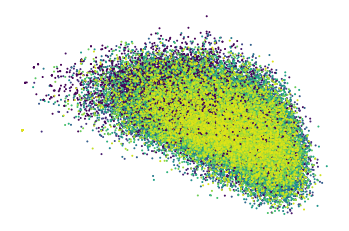

In [ ]:
# Homoglyphs Plot
plt.rc('font', size=12) 
plt.scatter(x_pca[:,0], x_pca[:,1], c=colors, s=1)
plt.axis('off')
plt.savefig("Homoglyphs.svg")
plt.show()

In [ ]:
zoom = []
for charset in charsets:
  if 'A' in charset:
    A = charset
    break
for i, label in enumerate(glyphs[0]):
  char = chr(int(label.split('.')[0]))
  if char in A:
    zoom.append((x_pca[i], char, colors[i]))

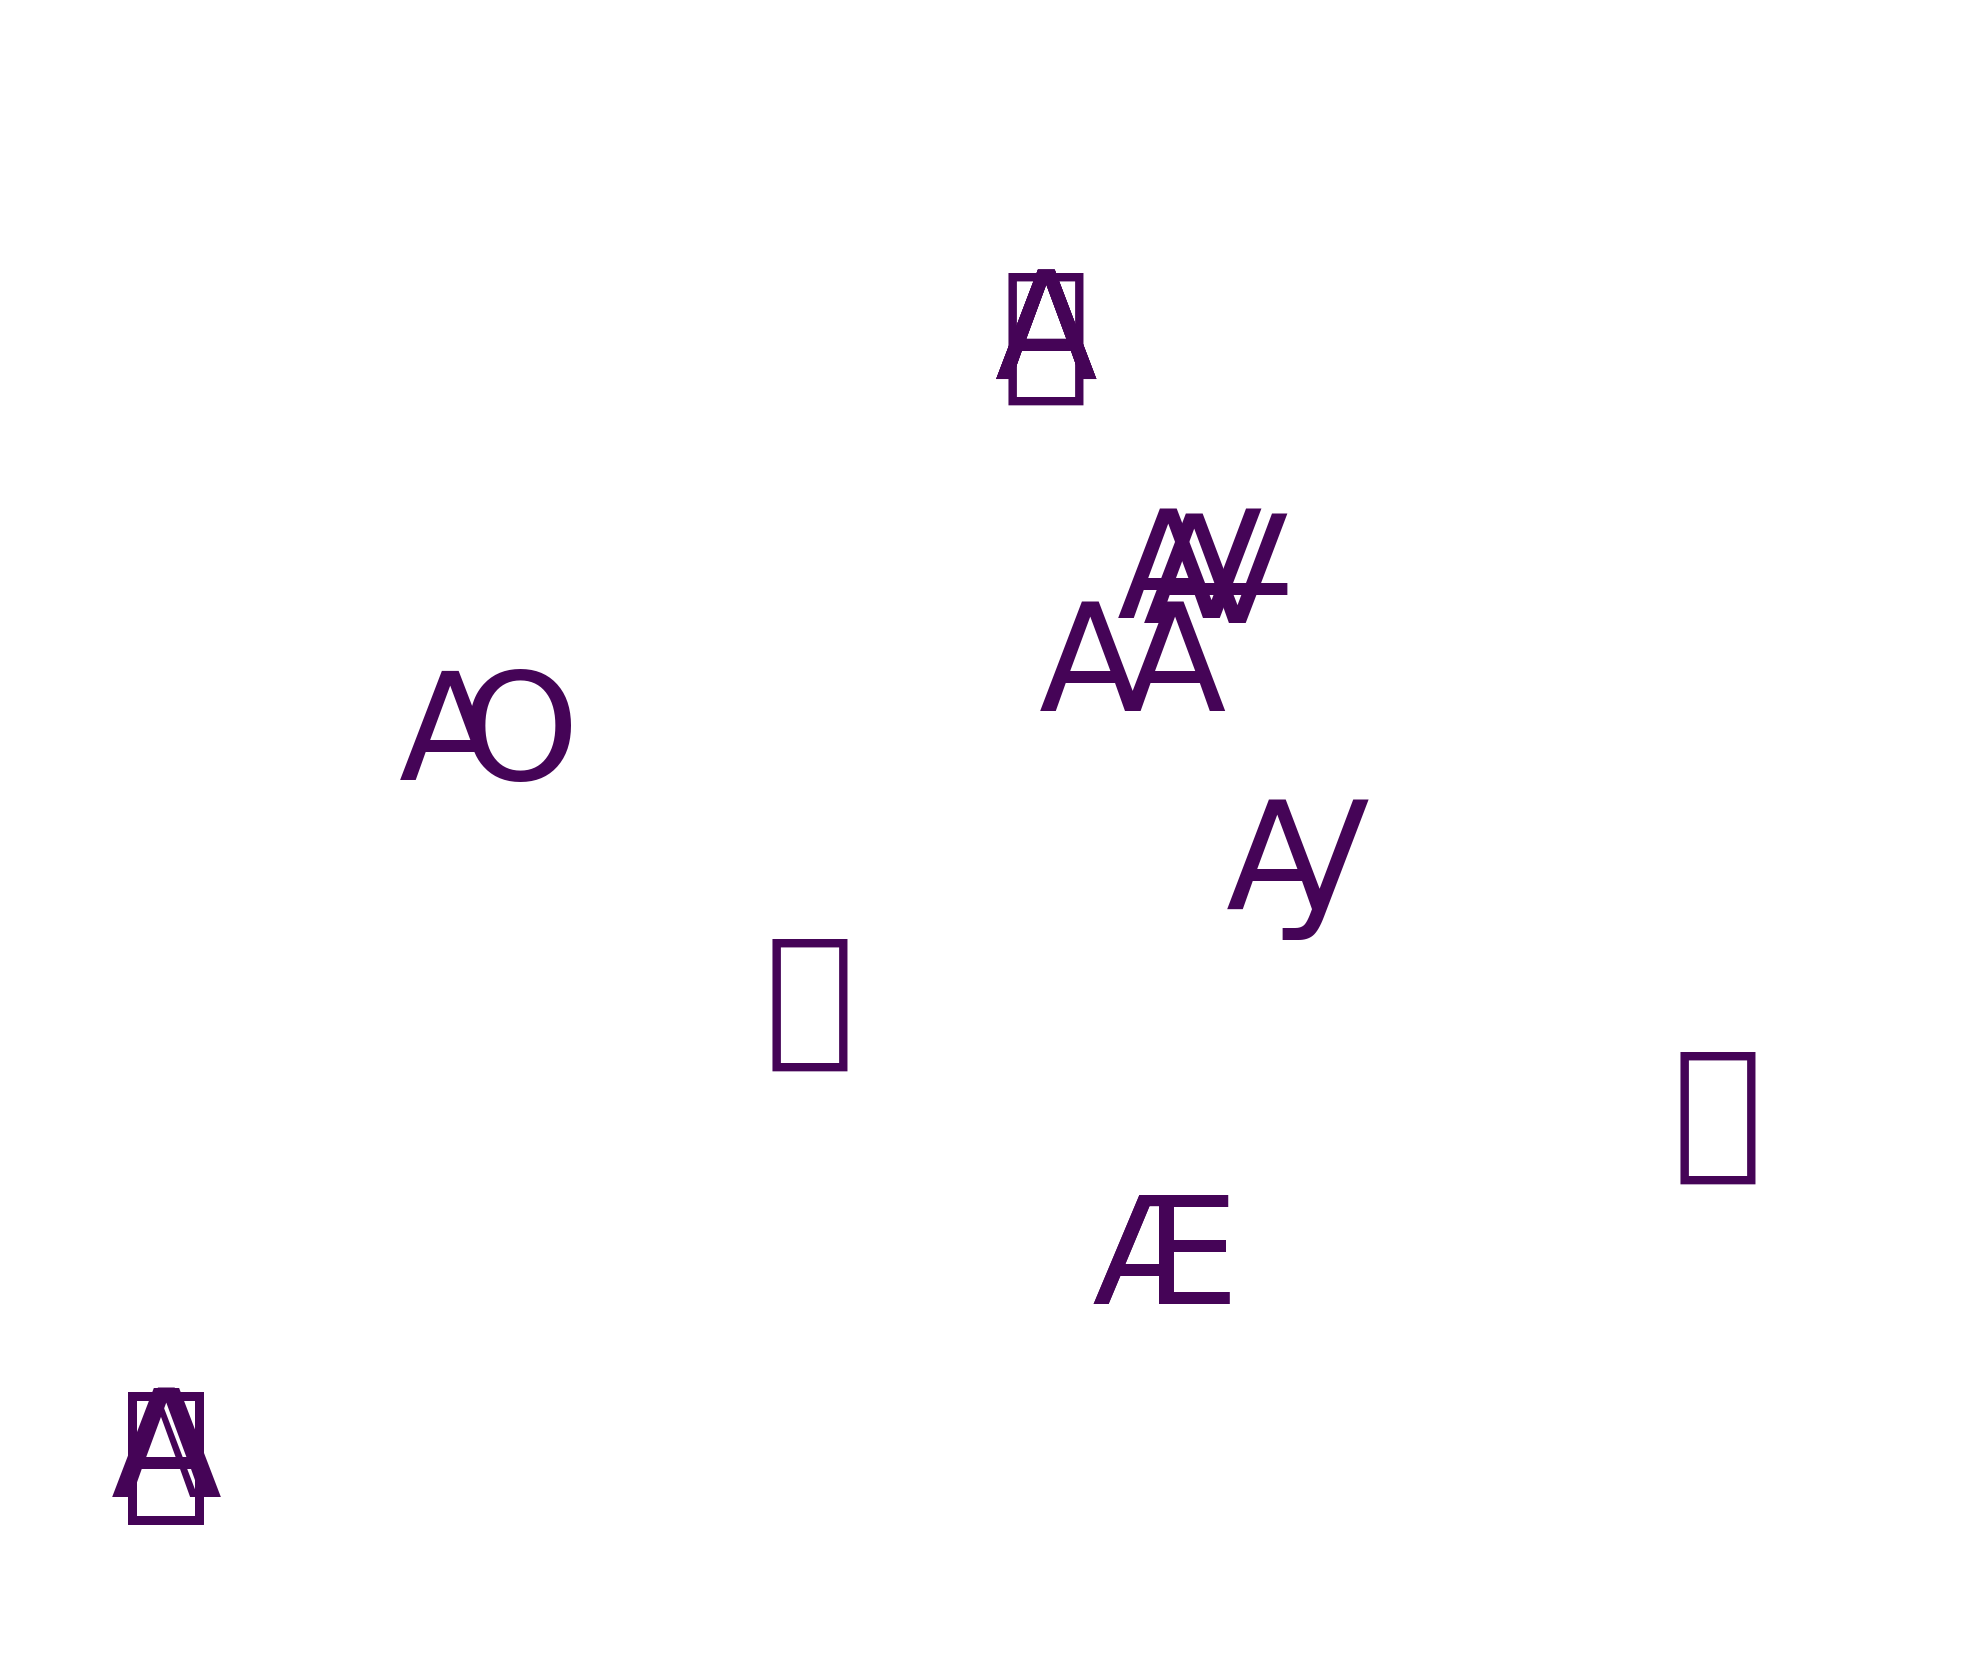

In [ ]:
# Zoom Homoglyphs
from matplotlib.font_manager import FontProperties

fig, axes = plt.subplots(figsize=(35,25))
axes.set_xlim(-15,20)
axes.set_ylim(-5,20)
for data, label, color in zoom:
  prop = FontProperties(size=150)
  plt.annotate(label, data,
              horizontalalignment='center',
              verticalalignment='center',
              color=color,
              fontproperties=prop)
plt.axis('off')
plt.savefig("HomoglyphsZoom.svg")
plt.show()